# **💉💉The Vaccine Uptake Prediction**

## STEP 1: **Business understanding**
### **Business Overview**
A **vaccine** is a medical tool that helps the body build immunity against diseases. Vaccines not only protect individuals but also protect communities through **herd immunity**, where enough people are immunized to reduce the overall spread of disease.


There are different types of vaccines, such as the **seasonal flu vaccine** (for common flu strains) and the **H1N1 vaccine** (for swine flu). These play a key role in preventing large outbreaks and saving lives.


In 2009, the world faced a pandemic caused by the **H1N1 influenza virus (swine flu)**, which led to an estimated **151,000–575,000 deaths** globally in its first year. A vaccine for H1N1 was introduced in **October 2009**. Shortly after, the **U.S. National 2009 H1N1 Flu Survey** was conducted to measure who received the **H1N1** and **seasonal flu** vaccines.


The survey also collected information on people’s **demographics, health status, behaviors, and opinions**. Studying this data helps us understand why some groups chose vaccination while others did not, and provides guidance for future **public health efforts**.

### **Problem Statement**
Although vaccines like the seasonal flu and H1N1 were available in 2009, uptake was low, especially for H1N1. This reflects vaccine hesitancy, which weakens herd immunity and increases disease risk.

The key challenge is to understand the factors influencing vaccination decisions—such as demographics, health beliefs, or doctor recommendations—and to build predictive models. These insights can help identify hesitant groups and support better public health strategies in future pandemics.

### **Business Objectives**

#### **Main Objective**
To build a predictive model that identifies the key factors influencing **H1N1 flu vaccine** uptake, to understand patterns of vaccine hesitancy, and provide insights that can guide future public health communication and decision-making.

#### **Specific Objectives** (NB// focused on H1N1 vaccine)
1. To analyse the effect of *demographic factors*(i.e., age,education,income) on vaccine uptake.
2. To analyse the effect of *opinions and beliefs* (e.g., vaccine effectiveness, risk perceptions, safety concerns)on vaccine uptake.
3. To investigate the influence of *health status and behaviours*(e.g., chronic conditions, mask use, handwashing) in influencing vaccination uptake.
4. To investigate  the influence of *Doctor's recommendations and a health worker* in influencing vaccination uptake.
#### **Research Questions**
1. How do demographic factors affect influence H1N1 vaccine uptake?
2. How do perceptions of vaccine effectiveness, risk of illness, and safety concerns affect H1N1 vaccination decisions uptake?
3. Do people with chronic medical conditions or protective behaviors (e.g., mask use, handwashing) show higher H1N1 vaccination uptake?
4. Does receiving a doctor’s recommendation or being a health worker  increase the likelihood of getting the H1N1 vaccine?

#### **Success Criteria**
##### Business success criteria:
* Gain a clear understanding of H1N1 vaccine uptake patterns across different features.
* Identify key factors that influence vaccine decisions.
* Provide insights that can guide public health communication strategies to reduce vaccine hesitancy.
##### Data success criteria:
* Perform thorough EDA with at least 10 meaningful visualizations that answer the research questions.
* Build at least two classification models to predict H1N1 vaccine uptake.
* Identify and rank the most important features influencing H1N1 vaccination.
* Ensure results are interpretable and clearly communicated for both technical and non-technical audiences.
  


## STEP 2: Data Understanding

In [2]:
# import necessary libraries for the project .
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# for data model preparations
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
# for modeling part.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import(
accuracy_score, recall_score, f1_score, precision_score,
roc_auc_score, confusion_matrix, classification_report
)
from sklearn.model_selection import RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load the H1N1 Flu vaccine dataset and check its shape.
H1N1_df= pd.read_csv('H1N1_Flu_Vaccines.csv')
H1N1_df.shape

(26707, 38)

In [4]:
# display basic info of the data
H1N1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
# display few rows of the data
H1N1_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [10]:
# check the data columns
H1N1_df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

## STEP 3: Data Preparation

In [12]:
# check out duplicates 
H1N1_df.duplicated().sum()

0

In [14]:
# drop  unnecessary cols from the data
seas_cols =['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'seasonal_vaccine']
H1N1_df= H1N1_df.drop(seas_cols, axis = 1)
H1N1_df= H1N1_df.drop(columns=['respondent_id','hhs_geo_region'], axis =1)
# check the len of cols remaining
len(H1N1_df.columns)

31

In [16]:
# Display missing values if any
null_percentages = (H1N1_df.isnull().sum() / len(H1N1_df)) * 100
null_percentages = np.round(null_percentages[null_percentages > 0].sort_values(ascending=False),2)
null_percentages

employment_occupation          50.44
employment_industry            49.91
health_insurance               45.96
income_poverty                 16.56
doctor_recc_h1n1                8.09
rent_or_own                     7.65
employment_status               5.48
marital_status                  5.27
education                       5.27
chronic_med_condition           3.64
child_under_6_months            3.07
health_worker                   3.01
opinion_h1n1_sick_from_vacc     1.48
opinion_h1n1_vacc_effective     1.46
opinion_h1n1_risk               1.45
household_children              0.93
household_adults                0.93
behavioral_avoidance            0.78
behavioral_touch_face           0.48
h1n1_knowledge                  0.43
h1n1_concern                    0.34
behavioral_large_gatherings     0.33
behavioral_outside_home         0.31
behavioral_antiviral_meds       0.27
behavioral_wash_hands           0.16
behavioral_face_mask            0.07
dtype: float64

In [18]:
# Drop cols with most missing vals and unnecessary
H1N1_df = H1N1_df.drop(columns=['employment_occupation', 'employment_industry'], axis =1)
H1N1_df.shape

(26707, 29)

In [20]:
H1N1_df.nunique()

h1n1_concern                   4
h1n1_knowledge                 3
behavioral_antiviral_meds      2
behavioral_avoidance           2
behavioral_face_mask           2
behavioral_wash_hands          2
behavioral_large_gatherings    2
behavioral_outside_home        2
behavioral_touch_face          2
doctor_recc_h1n1               2
chronic_med_condition          2
child_under_6_months           2
health_worker                  2
health_insurance               2
opinion_h1n1_vacc_effective    5
opinion_h1n1_risk              5
opinion_h1n1_sick_from_vacc    5
age_group                      5
education                      4
race                           4
sex                            2
income_poverty                 3
marital_status                 2
rent_or_own                    2
employment_status              3
census_msa                     3
household_adults               4
household_children             4
h1n1_vaccine                   2
dtype: int64

In [22]:
# replacing missing num_categorical cols with mode 

num_cat_cols = H1N1_df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cat_cols:
    mode_val = H1N1_df[col].mode()[0]
    H1N1_df[col] = H1N1_df[col].fillna(mode_val) 


In [24]:
# replacing missing categorical features with unknown
categorical_cols = H1N1_df.select_dtypes(include=['object']).columns
H1N1_df[categorical_cols] = H1N1_df[categorical_cols].fillna("unknown")


In [26]:
#Check if there are any cols with missing vals
H1N1_df.isnull().sum().any()

False

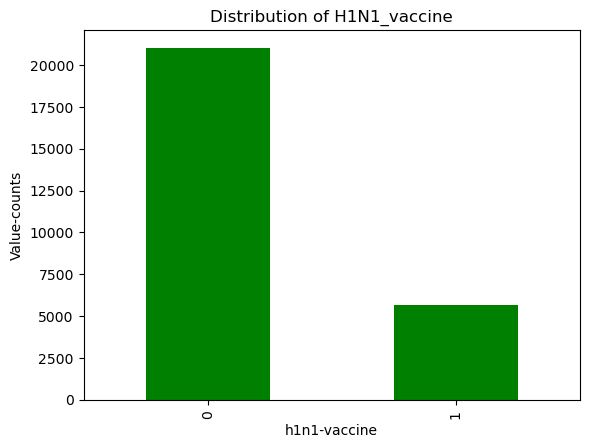

In [28]:
# univariate analysis
# check the value_count of the H1N1 vaccine
H1N1_df['h1n1_vaccine'].value_counts()
# plot the output.
H1N1_df['h1n1_vaccine'].value_counts().plot(kind = 'bar', color = 'green')
plt.title('Distribution of H1N1_vaccine')
plt.xlabel('h1n1-vaccine')
plt.ylabel('Value-counts')
plt.show()

* The **h1n1_vaccine** which will be our target variable is imbalanced.
* Meaning, the persons who did not take the vaccine (0) have a high number of 21033, while those who took the vaccine are 5674 in total.
* A huge difference of 15359 people.

## STEP 4 : EDA Analysis and Modelling  On The H1N1_df Data

### Q1 How do demographic factors affect H1N1 vaccination uptake?

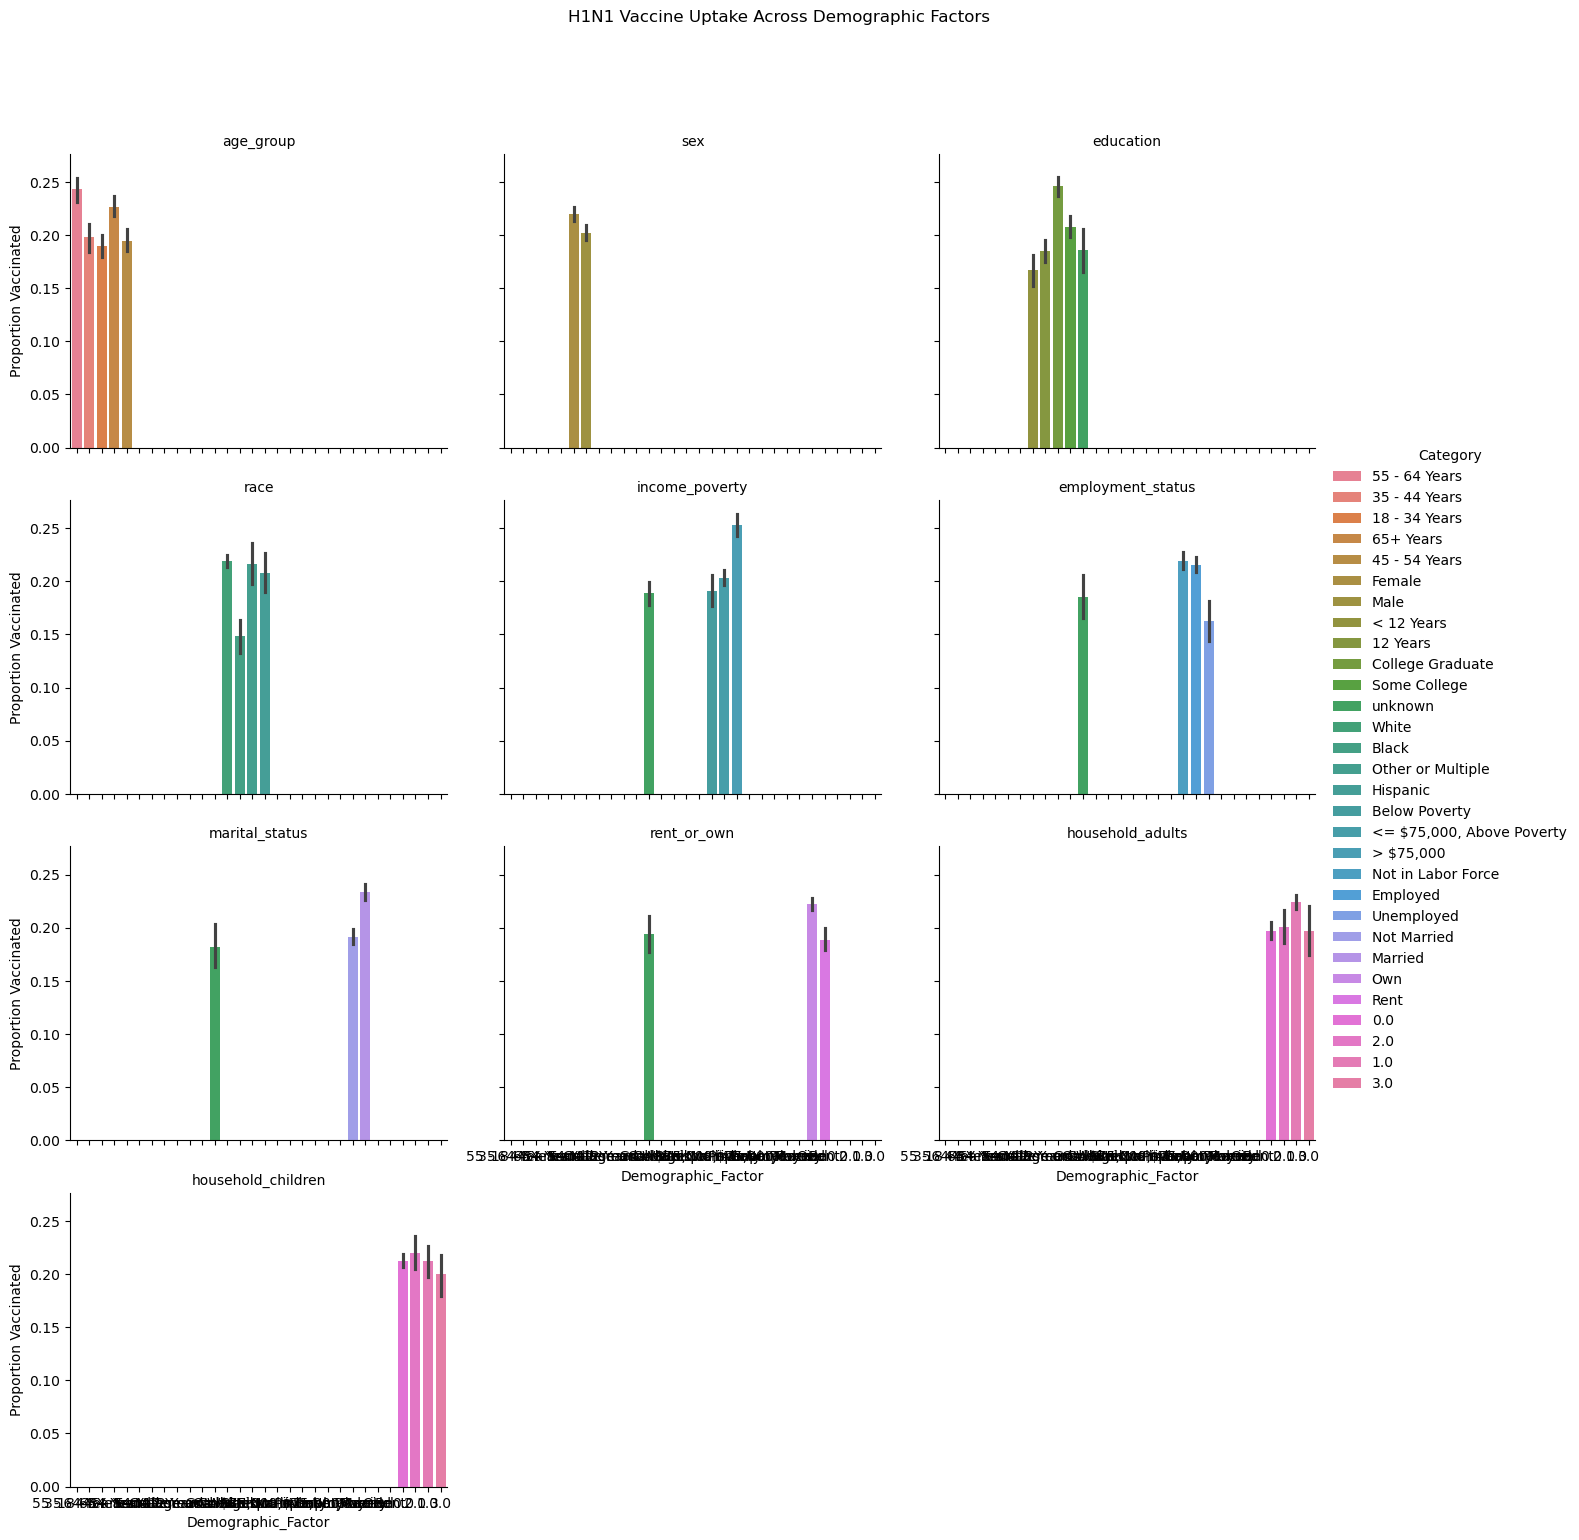

In [30]:
# select the demographic factors
# Multivariate analysis
demo_cols = ['age_group', 'sex', 'education', 'race', 'income_poverty', 'employment_status',
            'marital_status', 'rent_or_own', 'household_adults', 'household_children'
             ]
# melt it into a long format
df_melted =H1N1_df.melt( id_vars = 'h1n1_vaccine',
                         value_vars = demo_cols,
                         var_name = 'Demographic_Factor',
                         value_name = 'Category'
                        )
# plot  the uptake of h1n1_vaccine with each factor
g = sns.catplot(
    data=df_melted,
    x="Category",
    y="h1n1_vaccine",
    col="Demographic_Factor",
    hue = "Category",
    kind="bar",
    col_wrap=3,
    height=4.5,
    aspect=1
)
g.set_titles("{col_name}")
g.set_axis_labels("Demographic_Factor", "Proportion Vaccinated")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("H1N1 Vaccine Uptake Across Demographic Factors")
plt.show()


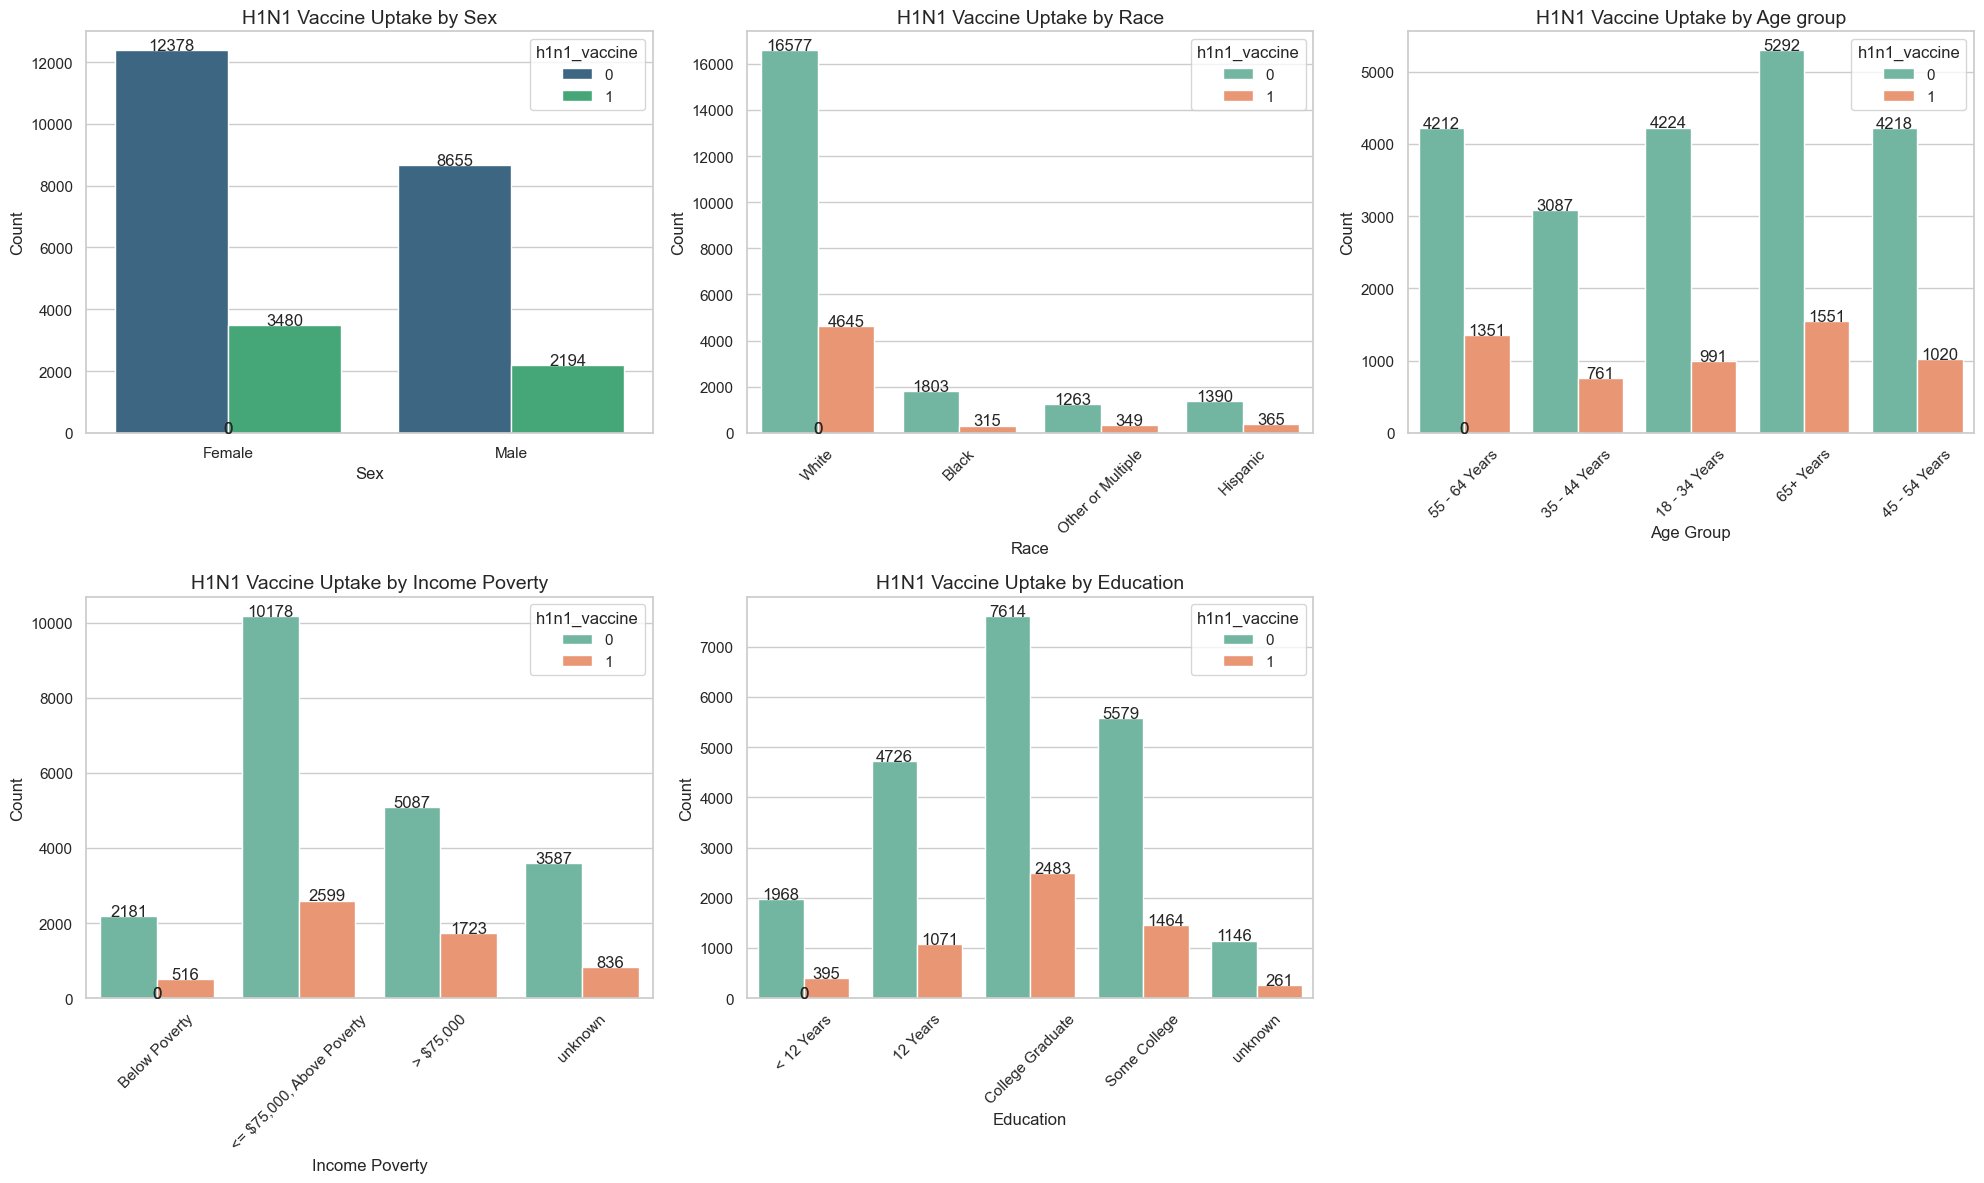

In [31]:
# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# 1. Plot for Sex vs H1N1 Vaccine
plt.subplot(2, 3, 1)
sex_plot = sns.countplot(data=H1N1_df, x='sex', hue='h1n1_vaccine', palette='viridis')
plt.title('H1N1 Vaccine Uptake by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

for p in sex_plot.patches:
    height = p.get_height()
    sex_plot.text(p.get_x() + p.get_width()/2., height + 3,
                  f'{height:.0f}', ha='center')

# 2. Plot for Race vs H1N1 Vaccine
plt.subplot(2, 3, 2)
race_plot = sns.countplot(data=H1N1_df, x='race', hue='h1n1_vaccine', palette='Set2')
plt.title('H1N1 Vaccine Uptake by Race', fontsize=14)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

for p in race_plot.patches:
    height = p.get_height()
    race_plot.text(p.get_x() + p.get_width()/2., height + 3,
                   f'{height:.0f}', ha='center')

# 3. Plot for Age_group vs H1N1 Vaccine
plt.subplot(2, 3, 3)
age_plot = sns.countplot(data=H1N1_df, x='age_group', hue='h1n1_vaccine', palette='Set2')
plt.title('H1N1 Vaccine Uptake by Age group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

for p in age_plot.patches:
    height = p.get_height()
    age_plot.text(p.get_x() + p.get_width()/2., height + 3,
                  f'{height:.0f}', ha='center')

# 4. Plot for Income Poverty vs H1N1 Vaccine
plt.subplot(2, 3, 4)
income_plot = sns.countplot(data=H1N1_df, x='income_poverty', hue='h1n1_vaccine', palette='Set2')
plt.title('H1N1 Vaccine Uptake by Income Poverty', fontsize=14)
plt.xlabel('Income Poverty', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

for p in income_plot.patches:
    height = p.get_height()
    income_plot.text(p.get_x() + p.get_width()/2., height + 3,
                     f'{height:.0f}', ha='center')

# 5. Plot for Education vs H1N1 Vaccine
plt.subplot(2, 3, 5)
edu_plot = sns.countplot(data=H1N1_df, x='education', hue='h1n1_vaccine', palette='Set2')
plt.title('H1N1 Vaccine Uptake by Education', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

for p in edu_plot.patches:
    height = p.get_height()
    edu_plot.text(p.get_x() + p.get_width()/2., height + 3,
                  f'{height:.0f}', ha='center')

plt.tight_layout()
plt.show()


* **Finding**
* > Age Group:
Older respondents (45-64, 65+ years) show a higher vaccine uptake than the younger groups(18-34, 35-44 years), who are less likely to be vaccinated.
The group with most people who are not vaccinated is (65+ yrs)
* > Sex:
Females have a  slightly higher Vaccine  uptake  than males.
The difference seems small but noticeable. Moreso, it has a high number of those not vaccinated .
* > Education:
 Higher education levels (College Graduate and some college) have a higher uptake of the vaccine than those with ≤12 years  of education.
* >Income poverty:
The group with (<=75000$, above poverty) have a slight high number of people vaccinated.
However, it also has a high number of those not vaccinated.



### Q2 How do perceptions of vaccine effectiveness, risk of illness, and safety concerns affect H1N1 vaccination uptake?

In [32]:
# place the opinion_h1n1_risk , opinion_h1n1_vacc_eeffective and opinion_h1n1_sick_from_vacc in a list
opinion_cols = ['opinion_h1n1_risk',
               'opinion_h1n1_vacc_effective',
               'opinion_h1n1_sick_from_vacc']
# check the corr()
H1N1_df[["h1n1_vaccine"] + opinion_cols].corr()

,h1n1_vaccine,opinion_h1n1_risk,opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc
h1n1_vaccine,1.000000,0.320580,0.267352,0.074580
opinion_h1n1_risk,0.320580,1.000000,0.259813,0.335013
opinion_h1n1_vacc_effective,0.267352,0.259813,1.000000,0.061805
opinion_h1n1_sick_from_vacc,0.074580,0.335013,0.061805,1.000000


In [33]:
# conduct a logistic regression  that aids in understanding how opinions influence vaccination (Via coefficients)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Features and target
X = H1N1_df[opinion_cols]
Y = H1N1_df["h1n1_vaccine"]

# (Optional but recommended) Scale features for stability
scaler = StandardScaler()         # to normalize/ make the scale uniform.
X_scaled = scaler.fit_transform(X)

# Fit logistic regression model
log_reg = LogisticRegression(max_iter=1000) # to give the regression  enough iterations to converge
log_reg.fit(X_scaled, Y)

# Print coefficients
coef_df = pd.DataFrame({
    "Feature": opinion_cols,
    "Coefficient": log_reg.coef_[0]
})
print("Intercept:", log_reg.intercept_[0])
print(coef_df)


Intercept: -1.6065630322809603
                       Feature  Coefficient
0            opinion_h1n1_risk     0.664098
1  opinion_h1n1_vacc_effective     0.730166
2  opinion_h1n1_sick_from_vacc    -0.078092


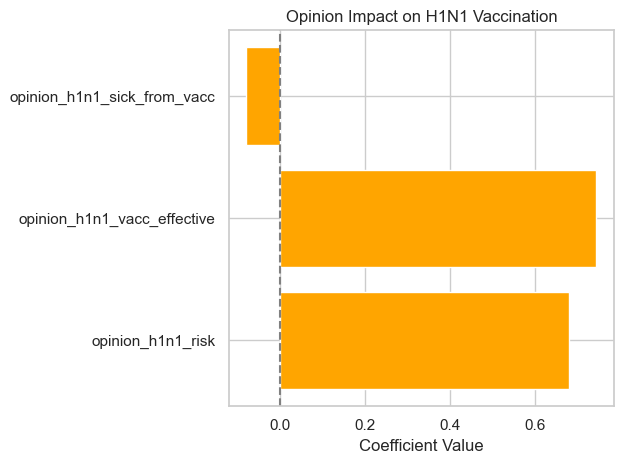

In [34]:

# Define your features and coefficients
features = ["opinion_h1n1_risk", "opinion_h1n1_vacc_effective", "opinion_h1n1_sick_from_vacc"]
coefficients = [0.681612, 0.745770, -0.080036]

# Create a DataFrame
coef_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})

# Plot
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color='orange')
plt.xlabel("Coefficient Value")
plt.title("Opinion Impact on H1N1 Vaccination")
plt.axvline(0, color='gray', linestyle='--')  # Reference line at zero
plt.tight_layout()
plt.show()


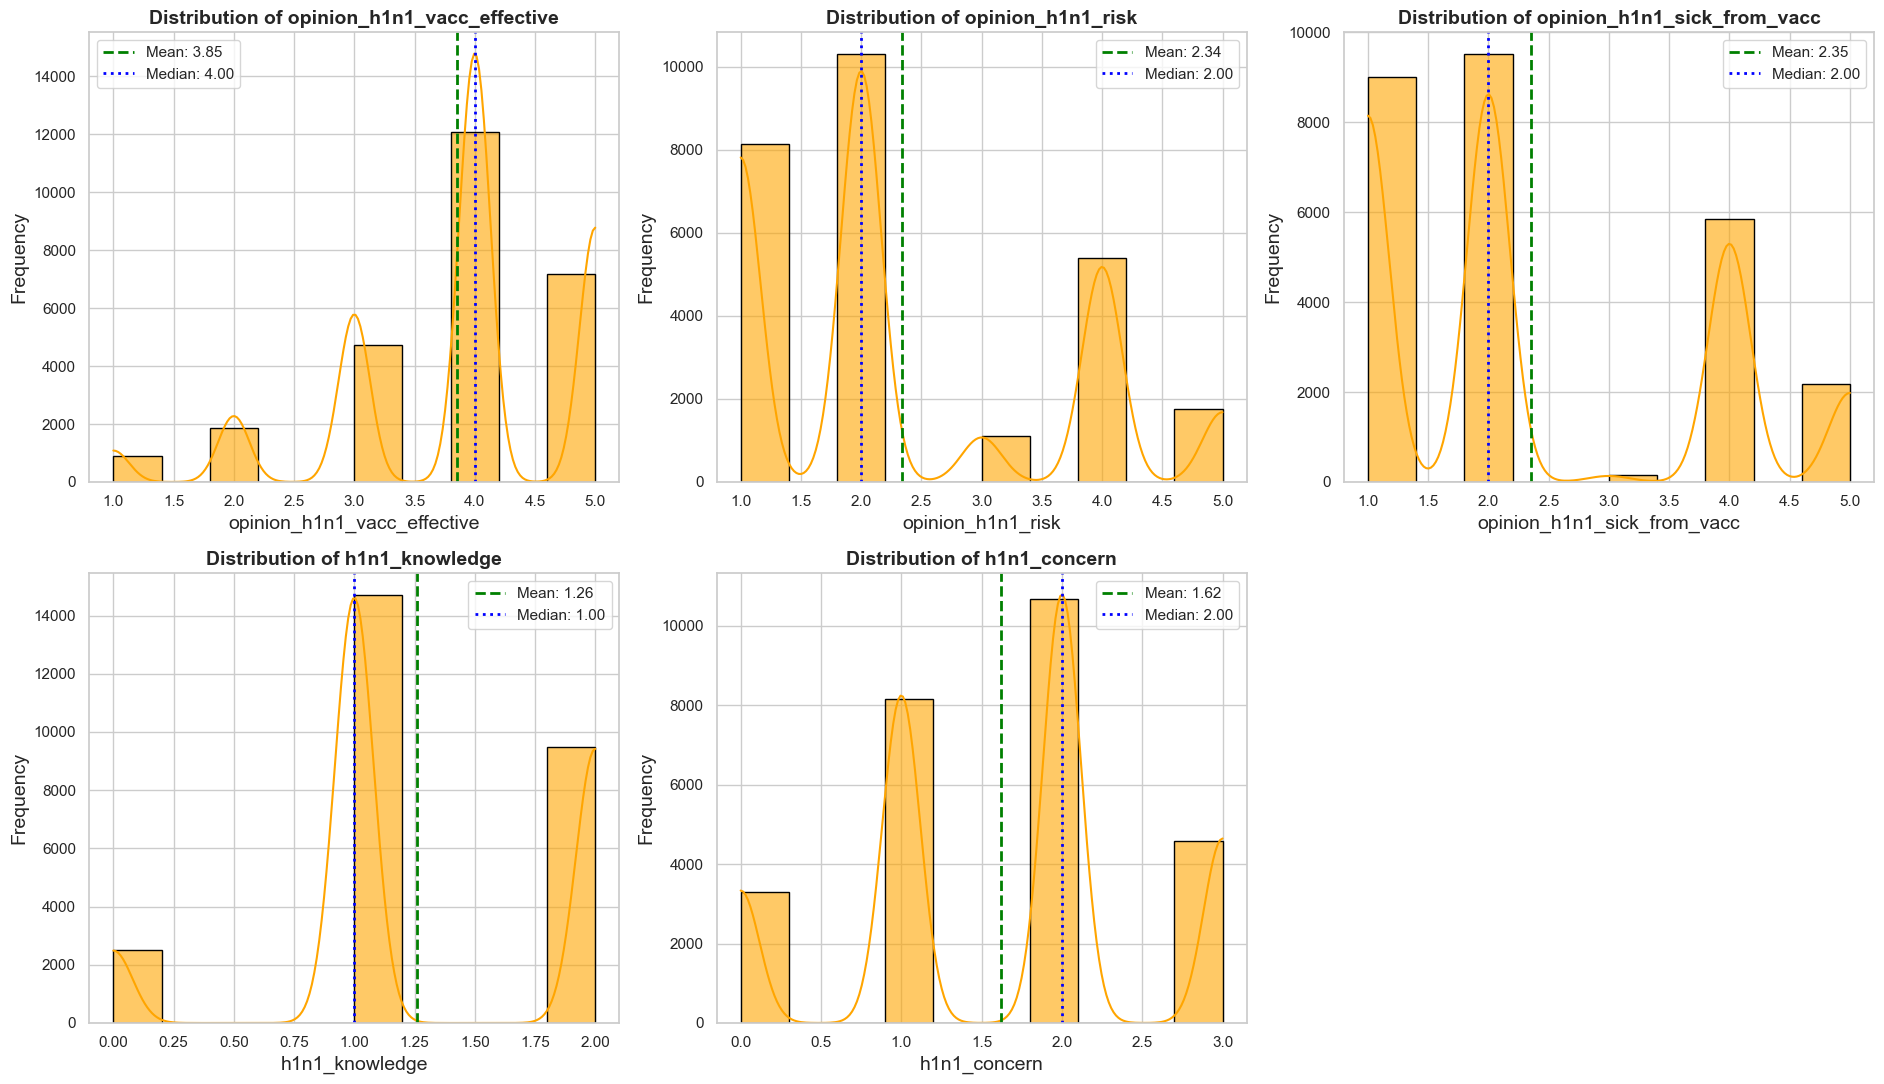

In [35]:
# Enhanced visualization of personal opinions distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")

Indicators = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
              'opinion_h1n1_sick_from_vacc', 'h1n1_knowledge', 'h1n1_concern']

plt.figure(figsize=(19, 11))

for i, Indicator in enumerate(Indicators, 1):
    plt.subplot(2, 3, i)  # row of 3 plots for side-by-side comparison
    
    # Plot histogram with KDE
    sns.histplot(
        H1N1_df[Indicator], 
        bins=10, kde=True, color="orange", alpha=0.6, edgecolor="black"
    )
    
    # Add vertical lines for mean and median
    mean_val = H1N1_df[Indicator].mean()
    median_val = H1N1_df[Indicator].median()
    
    plt.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, color='blue', linestyle=':', linewidth=2, label=f"Median: {median_val:.2f}")
    
    # Titles and labels
    plt.title(f'Distribution of {Indicator}', fontsize=14, fontweight="bold")
    plt.xlabel(Indicator, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend()

plt.tight_layout()
plt.show()


* Findings
Belief in Vaccine Effectiveness is the Strongest Driver of  vaccine Uptake:
* >From distributions: most people rated effectiveness high (median = 4.0).
* > From coefficients: opinion_h1n1_vacc_effective has the largest positive coefficient (+0.73), meaning the more effective people believe the vaccine is, the more likely they are to take it.
* >Implication: Increasing public trust in vaccine effectiveness could substantially boost uptake.
  
Perceived Risk of H1N1 Increases Chances  of Vaccination uptake:
* > Distribution shows the average risk perception is low (median = 2.0).
+ >But regression shows opinion_h1n1_risk has a strong positive coefficient (+0.66).
+ >Implication: Those who feel personally at risk are significantly more motivated to get vaccinated — low perceived risk across the population partly explains limited uptake.
  
Concerns About Side Effects Slightly Reduce Uptake:
+ >Distribution: most people rated low concern about getting sick from vaccine (median = 2.0), but some showed higher concern.
+ >Regression: opinion_h1n1_sick_from_vacc has a small negative coefficient (-0.08), showing this concern reduces likelihood of vaccination, though not as strongly as the positive drivers.
+ >Implication: While not the strongest barrier, addressing safety fears could help improve acceptance
  
The Vaccine Knowledge:
+ > The distribution is left skewed, with a (mean = 1.42,Median= 1.0) most respodents report low knowledge obut it.
+ > This suggests a knowledge gap in the population, which could have cotributed to the vaccine hesistancy.

The concern : 
+ > The distribution shows a right skewness,with a (mean= 2.20,median=2.0) thus th average cooncern is moderate.  
  
  


### Q3 Do people with chronic medical conditions or protective behaviors (e.g., mask use, handwashing) show higher H1N1 vaccination uptake?

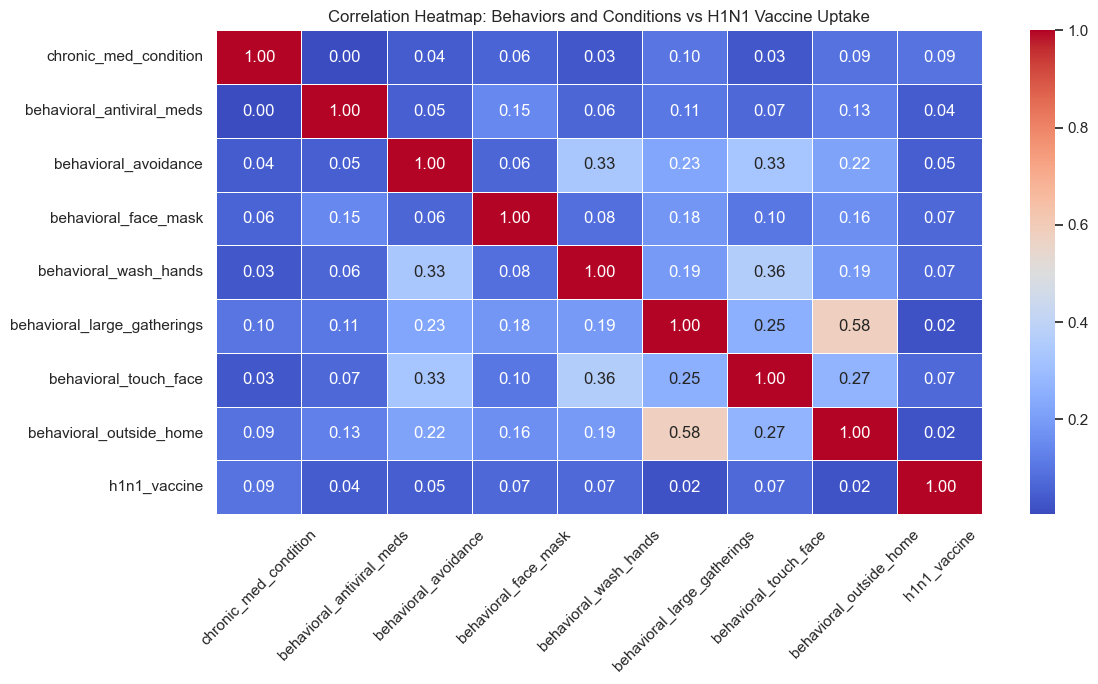

In [38]:
# create a correlation between the chronic medical conditions , protective behaviors and the target varviable (h1n1_vaccine)
cols_selected = ['chronic_med_condition', 'behavioral_antiviral_meds',
                'behavioral_avoidance', 'behavioral_face_mask',
                'behavioral_wash_hands', 'behavioral_large_gatherings',
                'behavioral_touch_face', 'behavioral_outside_home',
                'h1n1_vaccine']
data = H1N1_df[cols_selected]
correlation_matrix = data.corr()
# plot the correlation
plt.figure(figsize = (12,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Behaviors and Conditions vs H1N1 Vaccine Uptake')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* **Findings**
* > People with chronic medical conditions were slightly more likely to take the H1N1 vaccine (r = 0.10).
* > Protective behaviors such as mask use (r = 0.07), frequent handwashing (r = 0.07), and avoiding crowds (r = 0.05) also showed small positive links to vaccination.
* > However, the effects were weak overall, meaning that while health risks and protective habits encouraged uptake, they were not strong predictors of vaccination behavior.

### Q4 Does receiving a doctor’s recommendation or being a health worker  increase the likelihood of getting the H1N1 vaccine?

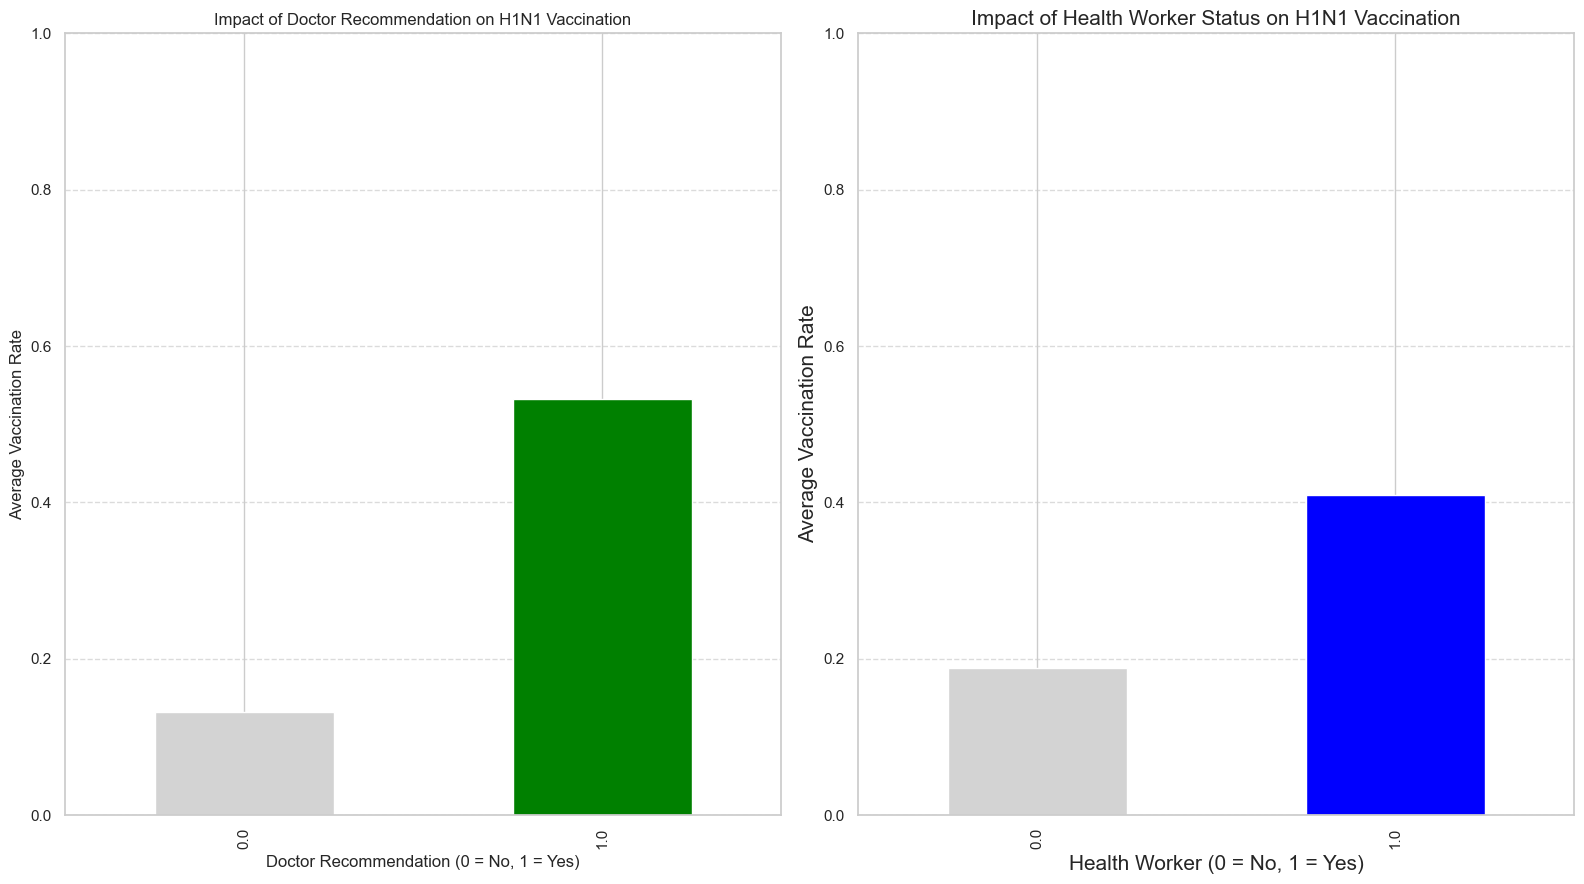

In [43]:
# bivariate analysis
# Group by doctor recommendation
doctor_rates = H1N1_df.groupby('doctor_recc_h1n1')['h1n1_vaccine'].mean()

# Group by health worker status
healthworker_rates = H1N1_df.groupby('health_worker')['h1n1_vaccine'].mean()

# Set up side-by-side plots
plt.figure(figsize=(16, 9))

# Plot 1: Doctor Recommendation
plt.subplot(1, 2, 1)
doctor_rates.plot(kind='bar', color=['lightgray', 'green'])
plt.xlabel('Doctor Recommendation (0 = No, 1 = Yes)')
plt.ylabel('Average Vaccination Rate')
plt.title('Impact of Doctor Recommendation on H1N1 Vaccination')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Health Worker Status
plt.subplot(1, 2, 2)
healthworker_rates.plot(kind='bar', color=['lightgray', 'blue'])
plt.xlabel('Health Worker (0 = No, 1 = Yes)', fontsize= 15)
plt.ylabel('Average Vaccination Rate',fontsize=15)
plt.title('Impact of Health Worker Status on H1N1 Vaccination',fontsize=15)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


* Findings
* > Those who received doctors reccommendation had a significantly higher average rate of vaccination.
* >This  suggests that trusted medical advice is a powerful driver of vaccination uptake.
* >Those working in health industries also have a significantly higher average rate of vaccination.
* > This reflects the great awereness or access to vaccine within the health care settings .

 

###  **build a reliable machine learning model to predict whether someone received the H1N1 vaccine?**

##### Model data splitting.

In [47]:
# Define features and target
X = H1N1_df.drop("h1n1_vaccine", axis=1)   # Features
# X values encodings.
X = pd.get_dummies(X, drop_first=True)

y = H1N1_df["h1n1_vaccine"]                # Target (imbalanced classes)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# check the shape of the training data
X_train.shape, y_train.shape

((21365, 43), (21365,))

In [51]:
# check the shape of the testing data
X_test.shape, y_test.shape

((5342, 43), (5342,))

##### Handling class imbalance

In [54]:
# Check the class distribution before applying SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train)}")

Class distribution before SMOTE: Counter({0: 16826, 1: 4539})


In [56]:
y_train = y_train.astype(int)

In [58]:
# Apply smote to the y_train  to handle the imbalance 
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [60]:
# check the class distribution of the smote 
print(f"Class distribution after SMOTE: {Counter(y_train_res)}")

Class distribution after SMOTE: Counter({0: 16826, 1: 16826})


##### Model data feature scaling

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

##### Model Development
* **Logistics Baseline Modeling**

In [64]:
#  logistics 
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4207
           1       0.49      0.65      0.56      1135

    accuracy                           0.78      5342
   macro avg       0.70      0.74      0.71      5342
weighted avg       0.81      0.78      0.79      5342

F1 Score: 0.7938
Precision: 0.8111
Recall: 0.7838
ROC AUC Score: 0.7942


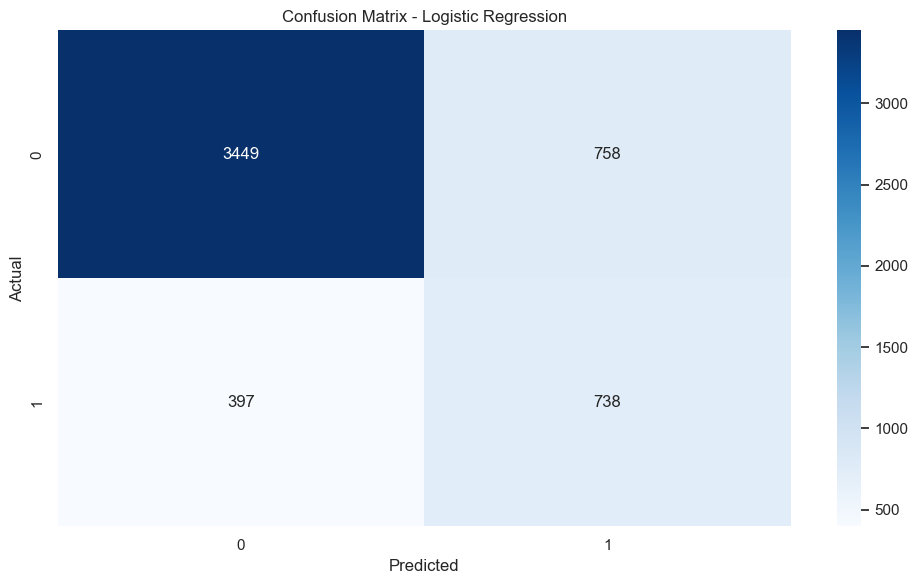

In [66]:
# Evaluate and predict 
y_pred = log_model.predict(X_test_scaled)
y_probs = log_model.predict_proba(X_test_scaled)[:, 1]

# Generate Classification report
print(classification_report(y_test,y_pred))
# metric scores 
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_probs)
# print outputs 
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("ROC AUC Score:", round(roc_auc, 4))
# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

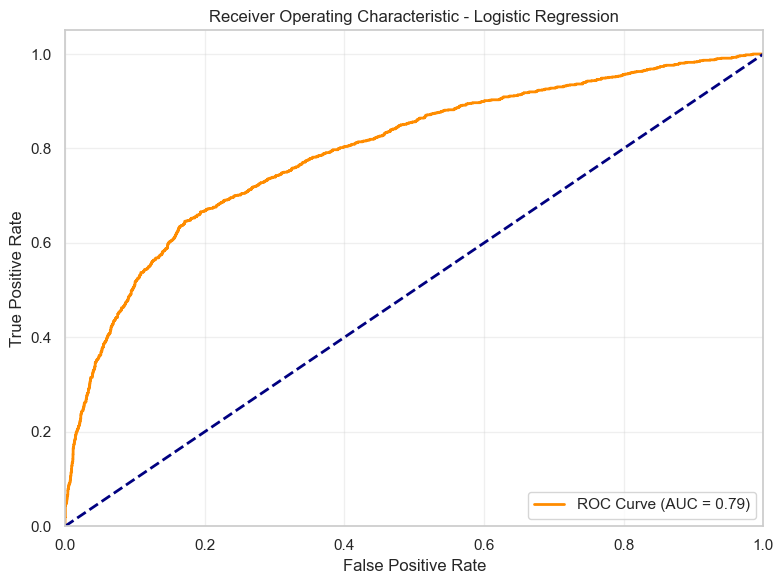

In [68]:
from sklearn.metrics import roc_curve,auc
# Get predicted probabilities for the positive class
y_probs = log_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* Finding
* > AUC = 0.79 this indicates that the model has 70% chance of  discriminatory power.
  >  This means that the model is able to distinguish  between someone who got the h1n1 vaccine and someone who didn't.

##### Leveling up with Random forest.

In [72]:
# random forest 
random_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
#print("Random Forest Evaluation:")
random_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

F1 Score: 0.4929
Precision: 0.6798
Recall: 0.4523
ROC AUC Score: 0.5316

 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.40      0.54      4207
           1       0.22      0.63      0.33      1135

    accuracy                           0.45      5342
   macro avg       0.51      0.52      0.43      5342
weighted avg       0.68      0.45      0.49      5342



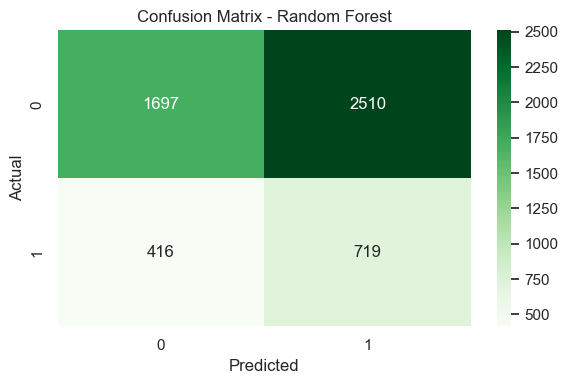

In [73]:
# evaluate and predict.
y_pred_rf = random_model.predict(X_test_scaled)
y_probs_rf = random_model.predict_proba(X_test_scaled)[:, 1]
# evaluate performance
# Random_forest evaluation.
print("F1 Score:", round(f1_score(y_test, y_pred_rf, average='weighted'), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf, average='weighted'), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf, average='weighted'), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_probs_rf), 4))

print("\n Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

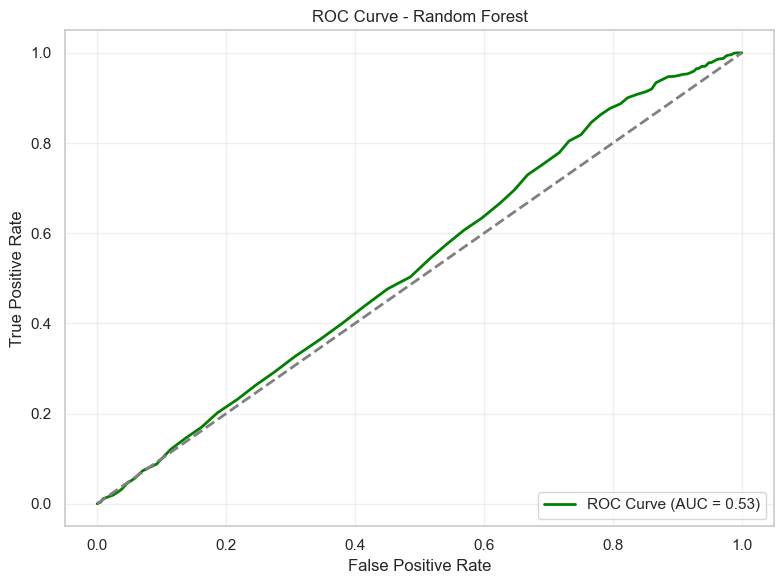

In [78]:
# Plot the ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

* Finding
* > Auc_score= 0.53: the model is only slightlly better than random guessing.
* > F1 score = 0.49: Weak overall balance between precision and recall
* > Precision for Class 0 = (Not vaccinated)=0.80 : when it predicts 'not vaccinated' is usually correct.
* > Recall for Class 0 = 0.40: But it misses 60% of actual “not vaccinated” cases.
* > Precision for Class 1 (Vaccinated) = 0.22 → Many false positives when predicting “vaccinated.”
* > Recall for Class 1 = 0.63 → Captures most vaccinated cases, but not reliably.
* > Accuracy = 45% → Less than half of predictions are correct overall.
* > Conclusion: The model struggles to separate the two classes and needs tuning or a better algorithm.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
 {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best F1 Score:
 0.8872368729811037
F1 Score: 0.6067
Precision: 0.7175
Recall: 0.5674
ROC AUC Score: 0.5986

 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67      4207
           1       0.27      0.60      0.37      1135

    accuracy                           0.57      5342
   macro avg       0.55      0.58      0.52      5342
weighted avg       0.72      0.57      0.61      5342



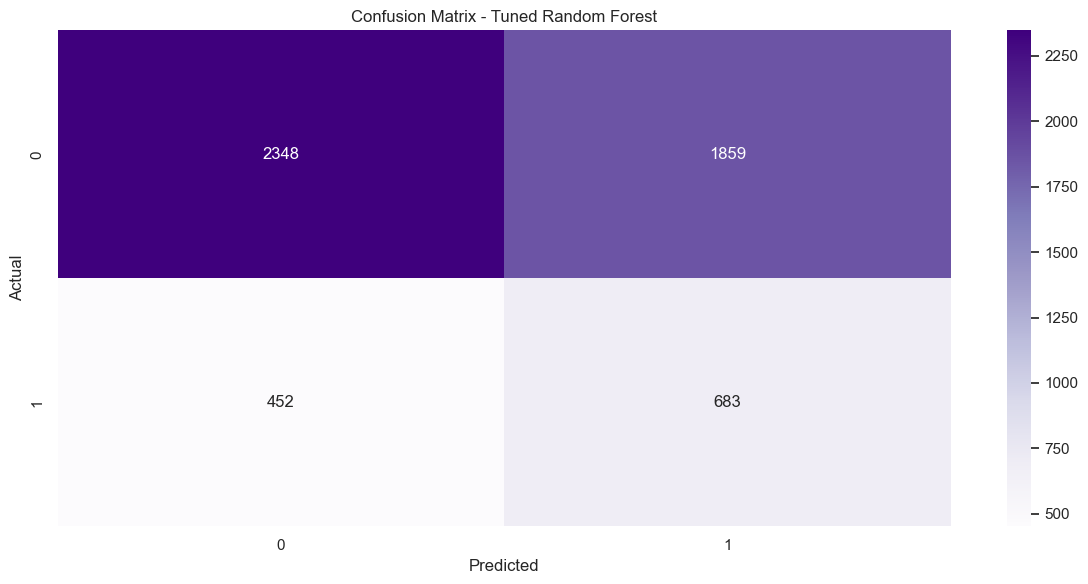

In [81]:
# Random Forest after tuning 

# Define parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize and perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_res, y_train_res)

# Print best parameters and score
print("Best Parameters:\n", random_search.best_params_)
print("Best F1 Score:\n", random_search.best_score_)

# Get and evaluate the best Random Forest model
tuned_rf = random_search.best_estimator_
# Predict on test set
y_pred_tuned = tuned_rf.predict(X_test_scaled)
y_probs_tuned = tuned_rf.predict_proba(X_test_scaled)[:, 1]

#  Metrics
f1 = f1_score(y_test, y_pred_tuned, average='weighted')
precision = precision_score(y_test, y_pred_tuned, average='weighted')
recall = recall_score(y_test, y_pred_tuned, average='weighted')
roc_auc = roc_auc_score(y_test, y_probs_tuned)
# Tuned Random Forest Evaluation
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("ROC AUC Score:", round(roc_auc, 4))

print("\n Classification Report:")
print(classification_report(y_test, y_pred_tuned))
# plot a confusion matrix 
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(12, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.tight_layout()
plt.show()

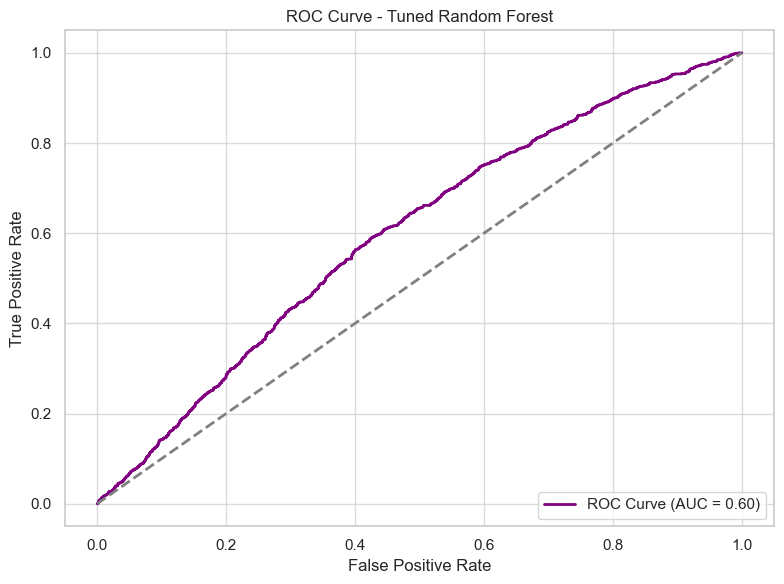

In [86]:
# plotting the Roc _curve 
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_probs_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

* Finding
* >AUC Score = 0.60 → The model is only slightly better than random guessing.
* > F1 Score = 0.61 → Moderate balance between precision and recall overall.
* >Precision = 0.72 → Most predicted cases are correct, especially for the majority class.
* > Recall = 0.57 → The model catches just over half of the actual cases.
* >Class 0 (Not vaccinated):
> Precision: 0.84 → Strong confidence when predicting “not vaccinated.”

> Recall: 0.56 → Misses 44% of actual “not vaccinated” cases.
* > Class 1 (Vaccinated):
> Precision: 0.27 → Many false positives when predicting “vaccinated.”

> Recall: 0.60 → Captures most vaccinated cases, but not very accurately.
* >  Accuracy = 57% → Slightly better than  than the previous one , but still low for reliable predictions.

Even after tuning, Random Forest struggles to separate the two classes well. It performs better than the untuned version, but not as well as Logistic Regression.

In [88]:
# improve the model 
# Train Gradient Boosting(No smote , raw data)
from sklearn.ensemble import HistGradientBoostingClassifier

gb_model = HistGradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]


In [109]:
# Gradient modle metrics 
print("Final Model: Gradient Boosting")
print("AUC:", round(roc_auc_score(y_test, y_probs_gb), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_gb, average='weighted'), 4))
print("Precision:", round(precision_score(y_test, y_pred_gb, average='weighted'), 4))
print("Recall:", round(recall_score(y_test, y_pred_gb, average='weighted'), 4))


Final Model: Gradient Boosting
AUC: 0.8247
F1 Score: 0.8173
Precision: 0.816
Recall: 0.8308


In [92]:
# evaluate all models 
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

def evaluate_model(name, y_true, y_pred, y_probs):
    print(f"\n {name} Evaluation:")
    print("F1 Score:", round(f1_score(y_true, y_pred, average='weighted'), 4))
    print("Precision:", round(precision_score(y_true, y_pred, average='weighted'), 4))
    print("Recall:", round(recall_score(y_true, y_pred, average='weighted'), 4))
    print("ROC AUC Score:", round(roc_auc_score(y_true, y_probs), 4))

evaluate_model("Logistic Regression", y_test, y_pred, y_probs)
evaluate_model("Tuned Random Forest", y_test, y_pred_rf, y_probs_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_probs_gb)



 Logistic Regression Evaluation:
F1 Score: 0.7938
Precision: 0.8111
Recall: 0.7838
ROC AUC Score: 0.7942

 Tuned Random Forest Evaluation:
F1 Score: 0.4929
Precision: 0.6798
Recall: 0.4523
ROC AUC Score: 0.5316

 Gradient Boosting Evaluation:
F1 Score: 0.8173
Precision: 0.816
Recall: 0.8308
ROC AUC Score: 0.8247


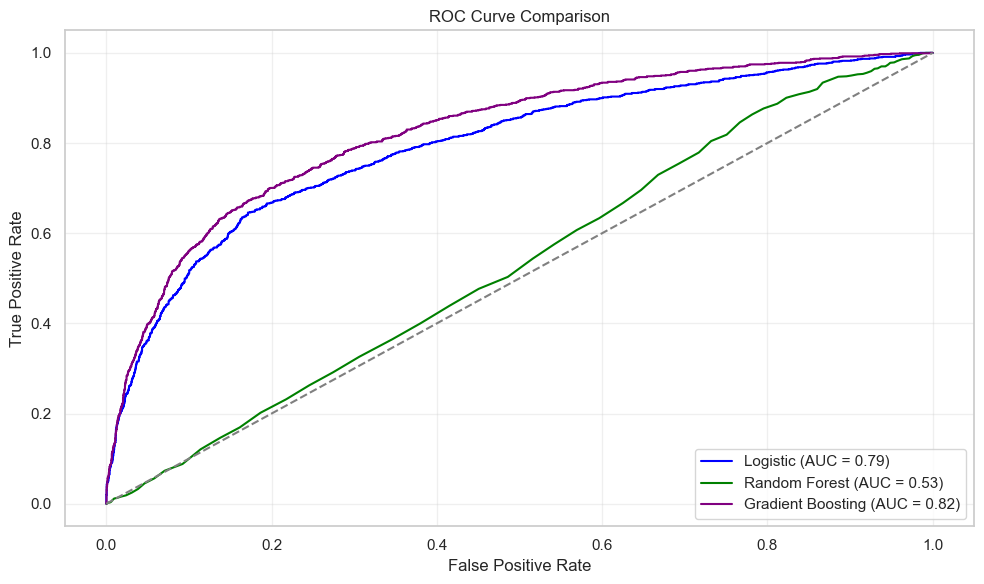

In [94]:
# Plot the Roc Curves side by side 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(y_test, y_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic (AUC = {auc(fpr_log, tpr_log):.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})', color='green')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc(fpr_gb, tpr_gb):.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* Findings
* > AUC Score = 0.82 → The model is excellent at separating vaccinated vs. non-vaccinated individuals.
* > F1 Score = 0.82 → Strong balance between precision and recall—very reliable overall.
* >Precision = 0.82 → When the model predicts someone is vaccinated, it’s usually correct.
* >Recall = 0.83 → The model successfully identifies most of the vaccinated individuals.
* > Conclusion: This model performs the best among all tested. It’s accurate, balanced, and trustworthy for predicting vaccine uptake.

##### Feature importance  with the best model

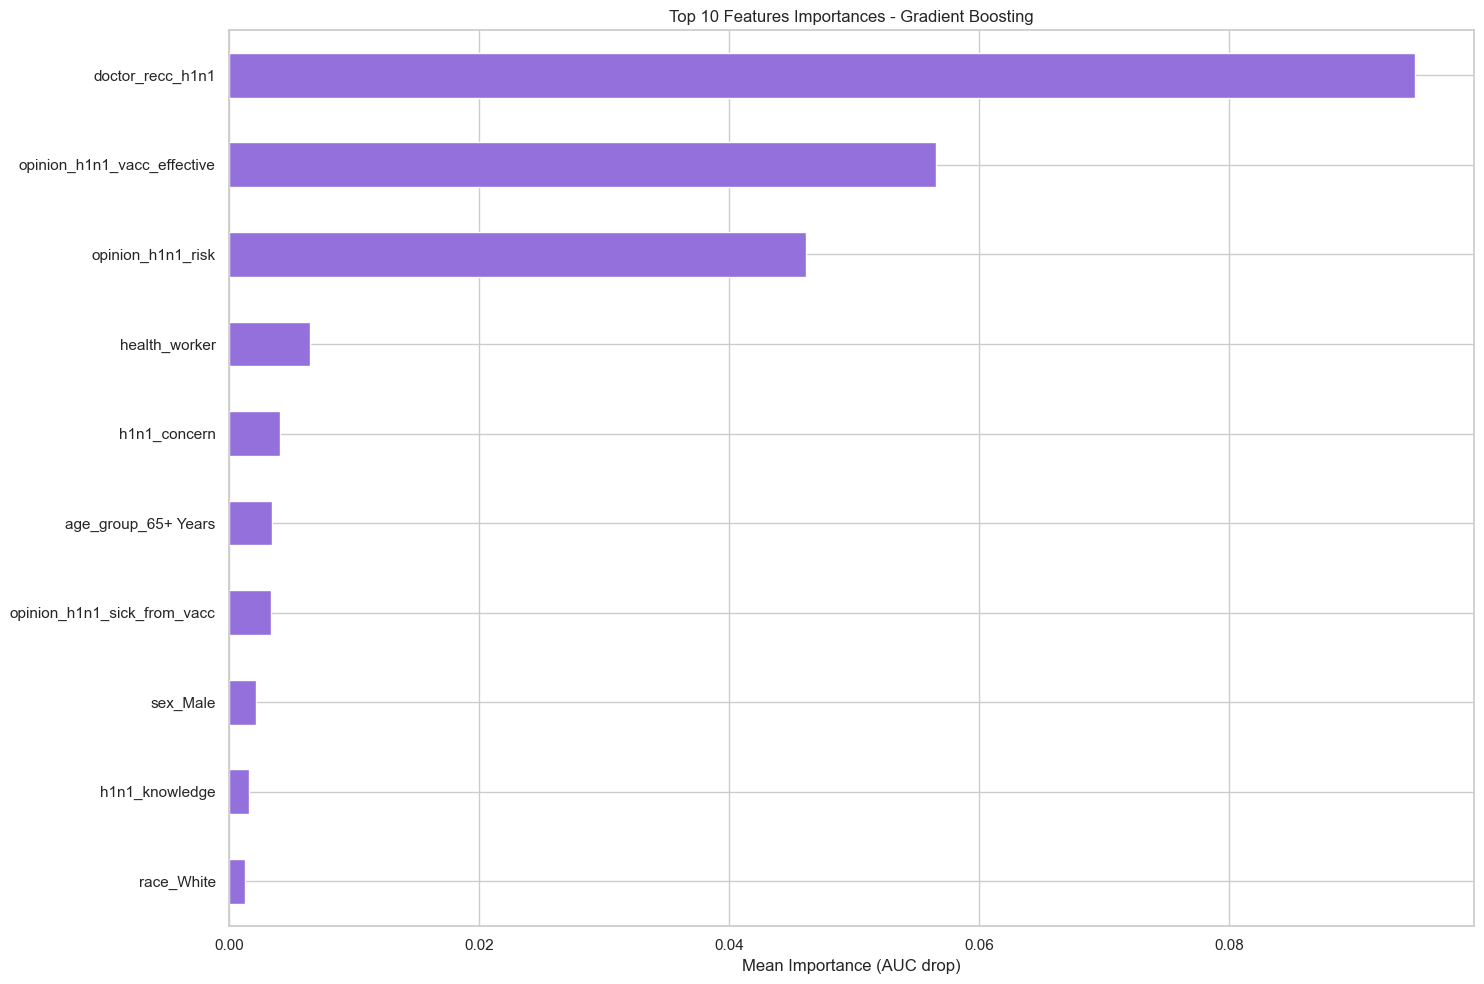

In [100]:
# plot the features with the  gradient boosting model
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Compute permutation importance
result = permutation_importance(
    gb_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc'
)

# Step 2: Format and sort top features
perm_importance = pd.Series(result.importances_mean, index=X.columns)
top_perm = perm_importance.sort_values(ascending=False).head(10)

# Plot top 10 features
plt.figure(figsize=(15, 10))
top_perm.plot(kind='barh', color='mediumpurple')
plt.title("Top 10 Features Importances - Gradient Boosting")
plt.xlabel("Mean Importance (AUC drop)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### Recommendation and conclusions 
1. Doctor’s role: Encourage doctors to actively recommend the H1N1 vaccine.

2. Effectiveness Messaging: Share clear evidence that the vaccine works.

3. Risk Awareness: Emphasize the dangers of H1N1 infection.

4. Close Knowledge Gaps: Provide simple education and target groups with hesistancy and low awereness.